<a href="https://colab.research.google.com/github/wesley-wms/reducao_dimensionalidade/blob/main/reducao_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

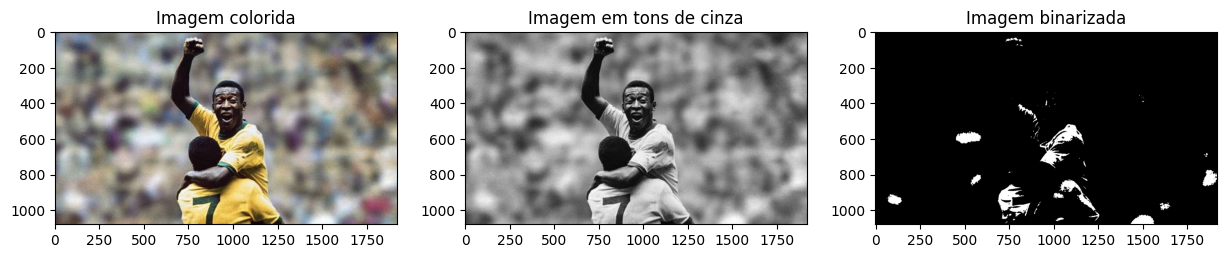

Imagem colorida: 154.55 KB
Imagem tons de cinza: 144.04 KB
Imagem binarizada: 70.73 KB


In [33]:
from PIL import Image
import matplotlib.pyplot as plt
import os, io

# Converte a imagem para tons de cinza
def converter_para_cinza(imagem):
    largura, altura = imagem.size
    pixels = imagem.load()

    for y in range(altura):
        for x in range(largura):
            r, g, b = pixels[x, y]

            # Aplicar a fórmula para conversão para tons de cinza
            cinza = int(0.299 * r + 0.587 * g + 0.114 * b)

            # Atribui o valor de cinza ao pixel
            pixels[x, y] = (cinza, cinza, cinza)

    return imagem

def binarizar(imagem, limiar):
    largura, altura = imagem.size
    pixels = imagem.load()

    for x in range(largura):
        for y in range(altura):
            cinza = pixels[x, y][0]

            if cinza > limiar:
                pixels[x, y] = (255, 255, 255) # Se o valor de cinza for maior que o limiar, o pixel será alterado para branco
            else:
                pixels[x, y] = (0, 0, 0) # Se o valor de cinza for menor ou igual ao limiar, o pixel será alterado para preto

    return imagem

imagem = Image.open('pele.jpg')
buffer = io.BytesIO()
imagem.save(buffer, format='JPEG')
tamanho_imagem_colorida = tamanho_bytes = len(buffer.getvalue()) / 1024

imagem_cinza = converter_para_cinza(imagem.copy())
buffer = io.BytesIO()
imagem_cinza.save(buffer, format='JPEG')
tamanho_imagem_tons_cinza = tamanho_bytes = len(buffer.getvalue()) / 1024

imagem_binarizada = binarizar(imagem_cinza.copy(), 220)
buffer.flush()
buffer = io.BytesIO()
imagem_binarizada.save(buffer, format='JPEG')
tamanho_imagem_binarizada = tamanho_bytes = len(buffer.getvalue()) / 1024


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(imagem)
plt.title('Imagem colorida')

plt.subplot(1, 3, 2)
plt.imshow(imagem_cinza)
plt.title('Imagem em tons de cinza')

plt.subplot(1, 3, 3)
plt.imshow(imagem_binarizada)
plt.title('Imagem binarizada')

plt.show()

print(f'Imagem colorida: {tamanho_imagem_colorida:.2f} KB')
print(f'Imagem tons de cinza: {tamanho_imagem_tons_cinza:.2f} KB')
print(f'Imagem binarizada: {tamanho_imagem_binarizada:.2f} KB')

# Quanto menor o limiar, mais branca a imagem será e menor por consequência